In [23]:
!pip install pyarabic

In [1]:
import numpy as np
import pandas as pd
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
#nltk.download('stopwords')
#from nltk.corpus import stopwords

from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
import Data_pre_processing as process #Data_pre_processing script
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import pickle
#from sklearn.externals import joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mohamed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("new_dialect_dataset.csv")
data

,id,text,dialect
0,1121525449874604032,#الخميس_الونيس\n\nانتو ملاحظين أن الغلطان هالأ...,KW
1,1123251810955865984,من الحين قاعد اضحك على اللي راح يصور ويكتب آخر...,KW
2,1124892962859683840,نرجو عدم التأليف بارسال التهاني برمضان او العي...,KW
3,1127803659478290432,@araaaatv ماراح تتعداك حوبة هالمسكين مهما بلغت...,KW
4,1129889371375755264,انت سد الفراغ اللي بشنبك بعدين سد فراغها العاطفي,KW
...,...,...,...
458192,1057418989293485952,@mycousinvinnyys @hanyamikhail1 متهيالي دي شكو...,EG
458193,1057775213113495552,@mycousinvinnyys @diamond_mamy ماعرفش لايصح غ...,EG
458194,1055620304465215616,@MahmoudWaked7 @maganenoo في طريق مطروح مركز ب...,EG
458195,1056641788851744768,@FayedSasa للاسف شعب يجري وراء الازمات بيحبوا ...,EG


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  object
 1   text     458197 non-null  object
 2   dialect  458197 non-null  object
dtypes: object(3)
memory usage: 10.5+ MB


In [4]:
data.text[458144]

'@mohd4_samar لا بيكشفوا بالسماعه الان كده 😂😂 https://t.co/m4gVN5KDU9'

In [5]:
data['text']= process.clean(data['text'])

In [6]:
data

,id,text,dialect
0,1121525449874604032,خميسالونيسانتو لحظ غلط هالأيام زعل,KW
1,1123251810955865984,حين قعد اضح يصر كتب اخر,KW
2,1124892962859683840,رجو عدم ألف رسل تها رمض عيد وبالنسبه لصر فكو ح...,KW
3,1127803659478290432,ارح تعد حوب هالمس بلغ ذنبوب معص,KW
4,1129889371375755264,سد فرغ شنب بعد سد فرغ عطف,KW
...,...,...,...
458192,1057418989293485952,هيال دي شكل هلو فين محل ده,EG
458193,1057775213113495552,ماعرفش يصح صحح,EG
458194,1055620304465215616,طرق طرح ركز بهج ركز جمب اسم ايه,EG
458195,1056641788851744768,لسف شعب يجر ورء ازم يحب طوابير زحم يحب يتب مين...,EG


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  object
 1   text     458197 non-null  object
 2   dialect  458197 non-null  object
dtypes: object(3)
memory usage: 10.5+ MB


In [8]:
data.text[458193]


'ماعرفش يصح صحح'

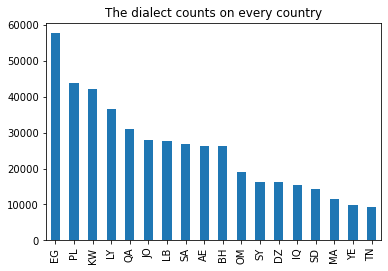

In [8]:
data.dialect.value_counts().plot(kind = 'bar');
#plt.Figure(15,15)
plt.title("The dialect counts on every country");
plt.show();

In [9]:
x = data.text.values
y = data.dialect.values


In [11]:
#tfidf_vec = TfidfVectorizer()
#x_transfom = tfidf_vec.fit_transform(x)


In [10]:
vectorizer = CountVectorizer()
x_counts = vectorizer.fit_transform(x)

tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x_counts)



In [11]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_tfidf,y,test_size=0.20, random_state=42)

In [12]:
x_train.shape

(366557, 196485)

In [13]:
x_test.shape

(91640, 196485)

In [14]:
clf_nb = MultinomialNB()
clf_nb.fit(x_train, y_train)

MultinomialNB()

In [15]:
y_predict = clf_nb.predict(x_test)

In [16]:
y_predict

array(['QA', 'PL', 'KW', ..., 'KW', 'PL', 'KW'], dtype='<U2')

In [17]:
print(metrics.classification_report(y_test, y_predict))


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AE       0.66      0.08      0.14      5330
          BH       0.68      0.03      0.07      5272
          DZ       0.87      0.11      0.19      3164
          EG       0.33      0.95      0.49     11715
          IQ       0.95      0.06      0.11      3059
          JO       0.64      0.04      0.07      5509
          KW       0.26      0.74      0.38      8333
          LB       0.77      0.30      0.43      5508
          LY       0.57      0.48      0.52      7324
          MA       0.98      0.12      0.21      2289
          OM       0.87      0.02      0.03      3854
          PL       0.28      0.60      0.38      8646
          QA       0.49      0.31      0.38      6193
          SA       0.59      0.06      0.11      5407
          SD       0.95      0.04      0.08      2961
          SY       0.94      0.02      0.04      3233
          TN       1.00      0.01      0.02      1815
          YE       0.00    

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
PAC= PassiveAggressiveClassifier()
PAC.fit(x_train , y_train)
y_pred = PAC.predict(x_test)

In [26]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AE       0.30      0.28      0.29      5330
          BH       0.25      0.24      0.24      5272
          DZ       0.47      0.42      0.44      3164
          EG       0.69      0.69      0.69     11715
          IQ       0.44      0.43      0.43      3059
          JO       0.25      0.29      0.27      5509
          KW       0.41      0.42      0.41      8333
          LB       0.46      0.55      0.50      5508
          LY       0.51      0.55      0.53      7324
          MA       0.56      0.48      0.52      2289
          OM       0.24      0.23      0.24      3854
          PL       0.37      0.41      0.39      8646
          QA       0.38      0.38      0.38      6193
          SA       0.30      0.24      0.27      5407
          SD       0.52      0.43      0.47      2961
          SY       0.29      0.21      0.25      3233
          TN       0.40      0.34      0.37      1815
          YE       0.16    

In [22]:
!pip install transformers

In [21]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,TensorDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm.auto import tqdm


In [24]:
len(max(data.text))

55

In [26]:
countries_labels = data.dialect.unique()
countries_labels 

array(['KW', 'AE', 'PL', 'MA', 'IQ', 'SA', 'OM', 'TN', 'YE', 'SD', 'SY',
       'BH', 'JO', 'LY', 'LB', 'DZ', 'QA', 'EG'], dtype=object)

In [27]:
targets = {k: v for v, k in enumerate(countries_labels)}

data['target'] = data['dialect'].apply(lambda x : targets[x])



In [28]:
tokenizer = AutoTokenizer.from_pretrained("CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment")

In [29]:
TEXT_MAX_LEN = 60 
#Data loader 
class MyDataset(Dataset):
    def __init__(self,data: pd.DataFrame = data,tokenizer = tokenizer,text_max_token_len: int = TEXT_MAX_LEN,):
        
        self.tokenizer = tokenizer
        self.data = data
        self.text_max_token_len = text_max_token_len
    
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index: int):
        data_row = self.data.iloc[index]

        text = data_row['text']

        text_encoding = tokenizer(
            text,
            max_length=self.text_max_token_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors='pt'
        )

        target = data['target']
        
        return dict(
            input_ids=text_encoding['input_ids'].flatten(),
            attention_mask=text_encoding['attention_mask'].flatten(),
            target=torch.tensor(target, dtype=torch.long),
        )

In [30]:
class AraBERTModel(nn.Module):
    def __init__(self):
        super(AraBERTModel, self).__init__()
        self.arabert = AutoModelForSequenceClassification.from_pretrained(
            "CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"
        )
        self.arabert.classifier = nn.Linear(in_features=768, out_features=18, bias=True)

    def forward(self, input_ids, attention_mask):
        output = self.arabert(input_ids, attention_mask=attention_mask)
        return output

In [34]:
train, test = model_selection.train_test_split(data,test_size=0.30, random_state=42)

train_dataset = MyDataset(train, tokenizer)
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=512)

test_dataset = MyDataset(test, tokenizer)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=512)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AraBERTModel()
model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

num_training_steps = num_epochs * len(train_dataloader)
progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        
        outputs = model(batch['input_ids'], batch['attention_mask'])
        logits = outputs.logits

        loss = criterion(logits, batch['target'])
        loss.backward()
        
        optimizer.step()
        
        optimizer.zero_grad()
        progress_bar.update()
    
    torch.save(model, './arabert_dialect.pth')
    print(f'epoch: {epoch} -- loss: {loss}')

  0%|          | 0/6270 [00:00<?, ?it/s]

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
clf = MLPClassifier(hidden_layer_sizes=(60,)
                     ,activation='relu',
                    solver='adam',
                    alpha=0.1,
                    learning_rate_init=0.1,
                    max_iter=1) 
clf.fit(x_train, y_train)

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.1, hidden_layer_sizes=(60,), learning_rate_init=0.1,
              max_iter=1)

In [20]:
y_pred = clf.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AE       0.13      0.11      0.12      5330
          BH       0.10      0.01      0.02      5272
          DZ       0.34      0.13      0.18      3164
          EG       0.44      0.73      0.55     11715
          IQ       0.46      0.11      0.18      3059
          JO       0.00      0.00      0.00      5509
          KW       0.21      0.29      0.25      8333
          LB       0.30      0.46      0.36      5508
          LY       0.21      0.52      0.30      7324
          MA       0.49      0.16      0.24      2289
          OM       0.00      0.00      0.00      3854
          PL       0.28      0.32      0.30      8646
          QA       0.20      0.43      0.27      6193
          SA       0.18      0.05      0.08      5407
          SD       0.48      0.18      0.26      2961
          SY       0.25      0.00      0.00      3233
          TN       0.00      0.00      0.00      1815
          YE       0.00    

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# take long Time of Train in one iterations same problem with LSTM the AraBERT Is best Model 